# ASSIGNMENT #6 - MODEL DATA #
Due: 21 April 2024 @ 11:59p

Purpose:\
The purpose of this assignment is to examine the netCDF data format using model data and plotting the output.  

Overview:\
In this assignment you will read in ECMWF ERA-40 Reanalysis netCDF4 and plot the data on a map.


| | UPDATE TO YOUR INFORMATION | 
| :- | :- |
| Created By | Jared W. Marquis |
| Creation Date | 21 January 2024 |
| Course | ATSC 270 - Computer Concepts in Meteorology |

In [ ]:
### UPDATE TO YOUR INFORMATION ###
#information allowing anyone with the code to print the author and contact information
__author__    = "Jared W. Marquis"
__contact__   = "jared.marquis@und.edu"

### IMPORT REQUIRED LIBRARIES ###

In [2]:
import numpy as np
from datetime import datetime, timedelta
from netCDF4 import Dataset
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

### OPEN NETCDF FILE ###

In [3]:
data = Dataset('ECMWF_ERA-40_subset.nc','r')
    
#analyze the variables and plot (on a map) SLP, 10-m winds, and total precipitation
lat = data.variables["latitude"][:]
lon = data.variables["longitude"][:]
time = data.variables["time"][:] #hours since 1900-01-01 00:00:0.0

#convert time to something more useful
dts = np.empty(len(time), dtype=datetime)
startTime = datetime(1900, 1, 1, 0, 0)

for index, t in enumerate(time):
    dts[index] = startTime + timedelta(hours=int(t))

tp = (data.variables["tp"][:] * 1000)
p10u = data.variables["p10u"][:] * 1.944
p10v = data.variables["p10v"][:] * 1.944
msl = (data.variables["msl"][:] / 100)

#print(msl)
#print(time)
#print(dts)

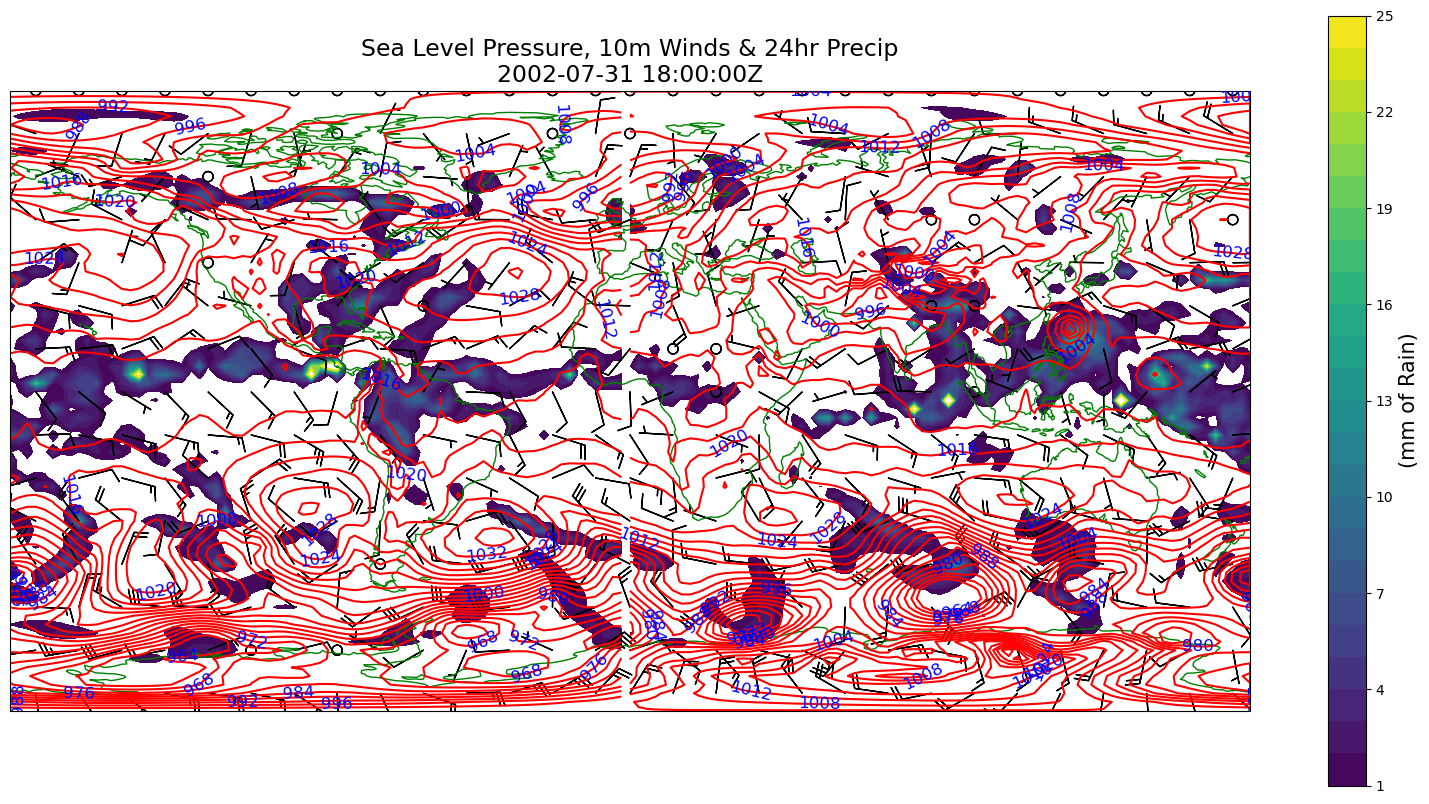

In [8]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.title("Sea Level Pressure, 10m Winds & 24hr Precip\n" + str(dts[61]) + "Z", fontsize=17)



plt.contourf(lon, lat, tp[1], list(range(1,26)), transform=ccrs.PlateCarree())

cb = plt.colorbar()
cb.set_label("(mm of Rain)", fontsize=15)

ct = plt.contour(lon, lat, msl[2], levels=range(964, 1100, 4), transform=ccrs.PlateCarree(), colors="red")
ax.clabel(ct, inline=True, colors="blue", fontsize=12)


plt.barbs(lon[::5], lat[::5], p10u[2, ::5, ::5], p10v[2, ::5, ::5], length=7, linewidth=1, transform=ccrs.PlateCarree())



ax.coastlines(color="green")

plt.savefig("model_data")
plt.show()
